In [8]:
from twitterscraper import query_tweets
import pandas as pd
from multiprocessing import Pool
from IPython.display import display
import sys
from twitterscraper.query import query_tweets_from_user
from twitterscraper.query import query_user_info
from twitterscraper.tweet import Tweet
from twitterscraper.user import User
from twitterscraper.ts_logger import logger as ts_logger

In [13]:
import csv
import json
import argparse
import collections
import datetime as dt
from os.path import isfile
from pprint import pprint
import codecs
import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [14]:
with codecs.open('immigration_immigrant_tweets_0203.json', 'r', 'utf-8') as f:
    tweets = json.load(f, encoding='utf-8')

In [27]:
import pandas as pd
df = pd.read_json('only_immigration_tweets.json', encoding='utf-8')
#sort
#df.sort_values("text", inplace = True)

In [28]:
df

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,False,0,[],,0,[],...,mandamonium,is very pleased that operation: immigrant surp...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-28 19:35:37,2006-11-28 19:35:37,390353,/mandamonium/status/390353,13171,Amanda Wood‽,
1,False,[],[],False,False,0,[],,0,[],...,Wordridden,Hating the Immigration and Nationality Directo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-27 12:54:14,2006-11-27 12:54:14,301013,/Wordridden/status/301013,12951,Jessica,
2,False,[],[],False,False,0,[],,0,[],...,mandamonium,has a 30 min window to get through immigration...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-27 01:22:32,2006-11-27 01:22:32,281563,/mandamonium/status/281563,13171,Amanda Wood‽,
3,False,[],[],False,False,0,[],,0,[],...,sacca,sun is rising beautifully over this london sub...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-19 08:25:44,2006-11-19 08:25:44,74327,/sacca/status/74327,586,Chris Sacca,
4,False,[],[],False,False,0,[],,0,[],...,mandamonium,is very pleased that operation: immigrant surp...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-28 19:35:37,2006-11-28 19:35:37,390353,/mandamonium/status/390353,13171,Amanda Wood‽,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,False,[],[],False,False,0,[https://www.pscp.tv/w/bmL_djFKUkVtWmdSWXJwUVB...,,0,[],...,MYLLLS,Watch what happened at 0:02 in @RealCandaceO's...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:32,2018-09-07 23:21:32,1038205659509010432,/MYLLLS/status/1038205659509010432,124463080,💞Karren🌟🌟🌟,
9708,False,[],[],True,True,72,[],1038202974911094785,6,"[{'screen_name': 'MrDenmore', 'user_id': '2329...",...,CarollynSybella,Australia was never that nation. White Austral...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:29,2018-09-07 23:21:29,1038205646556942336,/CarollynSybella/status/1038205646556942337,3301863414,Carollyn Lawrence,
9709,True,[],[https://pbs.twimg.com/media/DmhyhvfU4AUD4y1.jpg],False,False,0,[http://wildishtheater.com],,0,[],...,WildishTheater,Community Alliance of Lane County presents\nNo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:29,2018-09-07 23:21:29,1038205644040355840,/WildishTheater/status/1038205644040355840,900711612,Wildish Theater,
9710,False,[],[],False,False,0,[https://broadly.vice.com/en_us/article/qvmwpm...,,0,[],...,lawwizards,Man Arrested for Sexually Abusing 14-Year-Old ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:27,2018-09-07 23:21:27,1038205637992370176,/lawwizards/status/1038205637992370183,53710968,Dan R Taylor,


In [29]:
# preprocessing

# remove urls
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

no_urls = [remove_url(tweet) for tweet in df['text']]
no_urls

# data frame with no URL
df_no_urls = df.assign(text=no_urls)

# dropping ALL duplicte values 
df_no_urls.drop_duplicates(subset ="text", keep = 'first', inplace = True)

tweets = df_no_urls['text']

# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower() for tweet in tweets]
words_in_tweet

# finalized data frame with no URL, segregated lowercase words
df_final = df_no_urls.assign(text=words_in_tweet)

In [30]:
df_final

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,False,0,[],,0,[],...,mandamonium,is very pleased that operation immigrant surpr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-28 19:35:37,2006-11-28 19:35:37,390353,/mandamonium/status/390353,13171,Amanda Wood‽,
1,False,[],[],False,False,0,[],,0,[],...,Wordridden,hating the immigration and nationality directo...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-27 12:54:14,2006-11-27 12:54:14,301013,/Wordridden/status/301013,12951,Jessica,
2,False,[],[],False,False,0,[],,0,[],...,mandamonium,has a 30 min window to get through immigration...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-27 01:22:32,2006-11-27 01:22:32,281563,/mandamonium/status/281563,13171,Amanda Wood‽,
3,False,[],[],False,False,0,[],,0,[],...,sacca,sun is rising beautifully over this london sub...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2006-11-19 08:25:44,2006-11-19 08:25:44,74327,/sacca/status/74327,586,Chris Sacca,
8,False,[],[],False,False,0,[],,0,[],...,IMCUK,immigration minister arrested for locking up m...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-08-08 21:06:04,2007-08-08 21:06:04,194746392,/IMCUK/status/194746392,6284722,News Alerts,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,False,[],[],False,False,0,[https://www.pscp.tv/w/bmL_djFKUkVtWmdSWXJwUVB...,,0,[],...,MYLLLS,watch what happened at 002 in realcandaceos br...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:32,2018-09-07 23:21:32,1038205659509010432,/MYLLLS/status/1038205659509010432,124463080,💞Karren🌟🌟🌟,
9708,False,[],[],True,True,72,[],1038202974911094785,6,"[{'screen_name': 'MrDenmore', 'user_id': '2329...",...,CarollynSybella,australia was never that nation white australi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:29,2018-09-07 23:21:29,1038205646556942336,/CarollynSybella/status/1038205646556942337,3301863414,Carollyn Lawrence,
9709,True,[],[https://pbs.twimg.com/media/DmhyhvfU4AUD4y1.jpg],False,False,0,[http://wildishtheater.com],,0,[],...,WildishTheater,community alliance of lane county presentsnow ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:29,2018-09-07 23:21:29,1038205644040355840,/WildishTheater/status/1038205644040355840,900711612,Wildish Theater,
9710,False,[],[],False,False,0,[https://broadly.vice.com/en_us/article/qvmwpm...,,0,[],...,lawwizards,man arrested for sexually abusing 14yearold gi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:21:27,2018-09-07 23:21:27,1038205637992370176,/lawwizards/status/1038205637992370183,53710968,Dan R Taylor,


In [19]:
# metaphor families

#disaster
disaster_metaphors = ['apocalypse', 'pour', 'flow', 'army', 'dirt', 'porous', 'influx', 'conquer', 'pollution', 'wave', 'swamp', 'swamped', 'flood', 'flooded', 'tide', 'trickle', 'meltdown', 'crumble', 'out of control', 'terrorist', 'poison']
disaster = df_final[df_final['text'].str.contains('|'.join(disaster_metaphors))]

#container
container_metaphors = ['full', 'secure', 'pressure', 'bursting point', 'porous', 'drain', 'influx', 'flow']
container = df_final[df_final['text'].str.contains('|'.join(container_metaphors))]

#disease
disease_metaphors = ['infestation', 'invader', 'disease', 'germ', 'virus', 'invasion', 'wound']
disease = df_final[df_final['text'].str.contains('|'.join(disease_metaphors))]

#pollution
pollution_metaphors = ['waste']
pollution = df_final[df_final['text'].str.contains('|'.join(pollution_metaphors))]

#organism
organism_metaphors = ['digest', 'absorb', 'indigestible', 'transfusion', 'digested', 'absorbed', 'transfused', 'smuggle']
organism = df_final[df_final['text'].str.contains('|'.join(organism_metaphors))]

#object
object_metaphors = ['inflow', 'material', 'dumping', 'garbage', 'ingredients', 'power']
object = df_final[df_final['text'].str.contains('|'.join(object_metaphors))]

#animal
animal_metaphors = ['snake', 'venomous', 'cuckoo', 'animals', 'parasites', 'criminal', 'weed', 'animal', 'shoal']
animal = df_final[df_final['text'].str.contains('|'.join(animal_metaphors))]

#random
random_metaphors = ['porous']
random = df_final[df_final['text'].str.contains('|'.join(random_metaphors))]

In [32]:
animal

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
50,False,[],[],False,False,0,[],,0,[],...,BBCNews,police recapture three of the 14 convicted cri...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-08-07 16:30:21,2007-08-07 16:30:21,192120762,/BBCNews/status/192120762,612473,BBC News (UK),
73,False,[],[],False,False,0,[],,0,[],...,BBCEngland,the government is criticised as 14 foreign cri...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-08-06 09:20:58,2007-08-06 09:20:58,189404152,/BBCEngland/status/189404152,622113,BBC News England,
75,False,[],[],False,False,0,[],,0,[],...,sw12,itn video news escapees all criminals twentysi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-08-06 07:08:53,2007-08-06 07:08:53,189240162,/sw12/status/189240162,1290931,Sam Dutton,
264,False,[],[],False,False,0,[],,0,[],...,emotioner,should local police help deport illegal immigr...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-07-22 12:20:11,2007-07-22 12:20:11,162310802,/emotioner/status/162310802,2521661,geng wang,
308,False,[],[],False,False,0,[],,0,[],...,BBCPolitics,senior tory mp nicholas soames warns of danger...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2007-07-17 16:40:01,2007-07-17 16:40:01,154376292,/BBCPolitics/status/154376292,621533,BBC Politics,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,True,[trumppic],[https://pbs.twimg.com/media/Dmh2x-uVsAI8Khd.jpg],False,False,0,[],,0,[],...,trump__toons,immigration bad mexicans rapists mexicans crim...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:40:03,2018-09-07 23:40:03,1038210317379985408,/trump__toons/status/1038210317379985408,927952142366924800,Anti-Trump Toons,
9481,False,[],[],False,True,0,[],1038103589904777218,0,"[{'screen_name': 'realDonaldTrump', 'user_id':...",...,MikeSparkman65,whats hard to understand theyre convicted sent...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:38:10,2018-09-07 23:38:10,1038209844698927104,/MikeSparkman65/status/1038209844698927104,433964978,mike sparkman,
9508,False,[],[],False,True,1,[],1038103589904777218,0,"[{'screen_name': 'wesley_jordan', 'user_id': '...",...,LanceEtherton1,when did he call immigrants as a whole violent...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:35:58,2018-09-07 23:35:58,1038209291881201664,/LanceEtherton1/status/1038209291881201664,792471922214899712,Alpha Kenny1,
9624,True,"[Citizens, Criminal, LawandOrder, CommunitySAF...",[https://pbs.twimg.com/media/DmhzPMCX4AYjykn.j...,False,True,1,[],1037658169789607936,0,"[{'screen_name': 'WandaWCarpenter', 'user_id':...",...,loulouease,antiusa expert legal liars miscontrue cultural...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-09-07 23:27:40,2018-09-07 23:27:40,1038207200894898176,/loulouease/status/1038207200894898176,2802782560,Emma L Williams,


In [33]:
# subset tweet column
only_disaster = disaster[['text', 'user_id']]
only_disease = disease[['text', 'user_id']]
only_container = container[['text', 'user_id']]
only_pollution = pollution[['text', 'user_id']]
only_organism = organism[['text', 'user_id']]
only_object = object[['text', 'user_id']]
only_animal = animal[['text', 'user_id']]

# using list.extend() to concat 
temp = only_disaster.append(only_disease) 
temp1 = temp.append(only_container)
temp2 = temp1.append(only_pollution)
temp3 = temp2.append(only_organism)
temp4 = temp3.append(only_object)
final = temp4.append(only_animal)

In [34]:
final

,text,user_id
116,immigration buffer overflows,5473272
178,franois fillon plaide madrid pour une harmonis...,6652032
263,france elderly central african republic immigr...,794808
273,wave of immigration raids hardens stance on bo...,2521661
288,lespagne face un nouveau drame de limmigration...,6770022
...,...,...
9456,immigration bad mexicans rapists mexicans crim...,927952142366924800
9481,whats hard to understand theyre convicted sent...,433964978
9508,when did he call immigrants as a whole violent...,792471922214899712
9624,antiusa expert legal liars miscontrue cultural...,2802782560


In [23]:
#Subset dataframe
final.to_csv(r'final_predefined_metaphors.csv')
#tweets_hashtags_id.head()

In [35]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in df_final['text']]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.31666666666666665,
 TextBlob("is very pleased that operation immigrant surprise party was a success last night"))

In [36]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.31666666666666665,
 'is very pleased that operation immigrant surprise party was a success last night']

In [44]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.316667,is very pleased that operation immigrant surpr...
1,0.000000,hating the immigration and nationality directo...
2,0.000000,has a 30 min window to get through immigration...
3,0.850000,sun is rising beautifully over this london sub...
4,0.000000,immigration minister arrested for locking up m...
...,...,...
8600,-0.100000,watch what happened at 002 in realcandaceos br...
8601,-0.058333,australia was never that nation white australi...
8602,0.281250,community alliance of lane county presentsnow ...
8603,0.200000,man arrested for sexually abusing 14yearold gi...


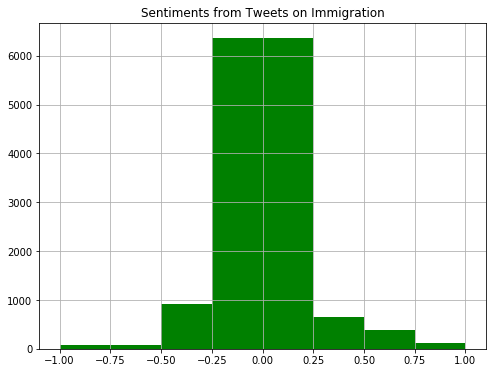

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on Immigration")
plt.show()

In [42]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

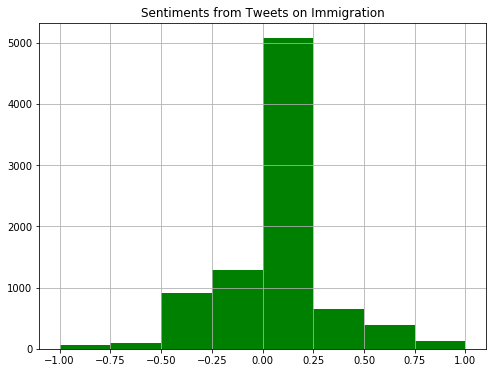

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green") 

plt.title("Sentiments from Tweets on Immigration")
plt.show()